# Modelado con SVM (Support Vector Machine)

## Preparación de información para el modelo

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
#leer csv
df = pd.read_csv('defunciones_clean.csv')

### Manejo de columnas y balanceo en causas de defunción

- Eliminación de columnas irrelevantes para el modelo

In [3]:
# drop columns no relevantes
df.drop('Departamento_Residencia_Madre', axis=1, inplace=True)

df.drop('Año_Registro', axis=1, inplace=True)
df.drop('Mes_Registro', axis=1, inplace=True)

df.drop('Mes_Ocurrencia', axis=1, inplace=True)
df.drop('Día_Ocurrencia', axis=1, inplace=True)        # No se considera el día de ocurrencia

df.drop('Departamento_Registro', axis=1, inplace=True)
df.drop('Departamento_Ocurrencia', axis=1, inplace=True)        

df.drop('Municipio_Registro', axis=1, inplace=True)
df.drop('Municipio_Ocurrencia', axis=1, inplace=True)          
df.drop('Municipio_Residencia_Madre', axis=1, inplace=True)

- Balanceo de clases en causas de defunción

In [4]:
from imblearn.over_sampling import RandomOverSampler

print('Cantidad de registros: ', len(df))
print('Cantidad de registros por causa de defunción: ')
print(df['Causa_Defunción'].value_counts())

x = df.drop('Causa_Defunción', axis=1)
y = df['Causa_Defunción']

balance = RandomOverSampler(sampling_strategy='minority')
x_balance, y_balance = balance.fit_resample(x, y)

df = pd.concat([x_balance, y_balance], axis=1)

print('Cantidad de registros por causa de defunción: ')
print(df['Causa_Defunción'].value_counts())

Cantidad de registros:  39298
Cantidad de registros por causa de defunción: 
0     35271
99     3466
1       561
Name: Causa_Defunción, dtype: int64
Cantidad de registros por causa de defunción: 
0     35271
1     35271
99     3466
Name: Causa_Defunción, dtype: int64


- Separar en entrenaminto y prueba

In [5]:
print('Cantidad de registros: ', len(df))

X = df.drop("Causa_Defunción", axis=1)
Y = df["Causa_Defunción"]

#dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size=0.5, random_state=100)

print('Cantidad de registros de entrenamiento: ', len(X_entreno))
print('Cantidad de registros de prueba: ', len(X_prueba))

df.head()



Cantidad de registros:  74008
Cantidad de registros de entrenamiento:  37004
Cantidad de registros de prueba:  37004


,Área_Geográfica,Asistencia_Recibida,Año_Ocurrencia,Clase_Parto,Edad_Madre,Estado_Civil_Madre,Escolaridad_Madre,Ocupación_Madre,Semanas_Gestacion,Sexo,Sitio_Ocurrencia,Tipo_Atencion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos,Via_Parto,Nacionalidad_Madre,Grupo_Etnico_Madre,Causa_Defunción
0,99,6,2009,1,18.0,2,99,99,34.416349,1,2,1,1.269311,2.0,1.0,99,1,4,0
1,99,1,2009,1,36.0,2,99,1,34.416349,1,9,1,1.269311,3.0,2.0,99,1,4,0
2,99,2,2009,1,22.0,2,99,99,34.416349,1,2,1,1.269311,3.0,2.0,99,1,4,0
3,99,2,2009,1,26.0,2,99,99,34.416349,1,2,1,1.269311,0.0,0.0,99,1,4,0
4,99,2,2009,1,43.0,2,99,99,34.416349,2,2,1,1.269311,10.0,6.0,99,1,4,0


## Creación del modelo SVM

Se utiiza GridSearchCV para determinar que hiperparámetros son los más óptimos para el respectivo modelo.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
}

svm_dummy = svm.SVC()

# smaller sample size for grid search, since it is an exhaustive process and it takes a lot of time
X_entreno_sample = X_entreno.sample(frac=0.001, random_state=100)
y_entreno_sample = y_entreno.sample(frac=0.001, random_state=100)

svm_grid = GridSearchCV(svm_dummy, params, n_jobs=-1, verbose=2, cv=3)

In [7]:
svm_grid.fit(X_entreno_sample, y_entreno_sample) 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Grid search results:")
print("---------------------")
results = svm_grid.cv_results_

print(results)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Grid search results:
---------------------
{'mean_fit_time': array([0.00966636, 0.0106678 , 0.01133442, 0.00833575, 0.00632985,
       0.00633136, 0.00767048, 0.0106647 , 0.00633883, 0.00633279,
       0.00533533, 0.0063316 , 0.00666595, 0.00533064, 0.00666881,
       0.00566816, 0.00700124, 0.00566332, 0.00466315, 0.00600243,
       0.00699933, 0.00533406, 0.00400066, 0.00499105, 0.00533088,
       0.00500003, 0.0053339 , 0.00566673, 0.00666849, 0.00600155,
       0.00799115, 0.0069991 , 0.00600084, 0.00499805, 0.00433493,
       0.00666372, 0.00599853, 0.00566912, 0.00567063, 0.00533565,
       0.00466704, 0.00534264, 0.006001  , 0.00632993, 0.01866444,
       0.00600378, 0.00533803, 0.0056661 , 0.00467086, 0.00833178,
       0.00533183, 0.00633558, 0.00566602, 0.00599742, 0.00433962,
       0.00699822, 0.00533621, 0.00533295, 0.00533462, 0.00800157,
       0.00666833, 0.00666904, 0.00533652, 0.00967002, 0.00499948,
       0.00633423, 0.00499948, 0.00699957, 0.00466855, 0.00533533,
 

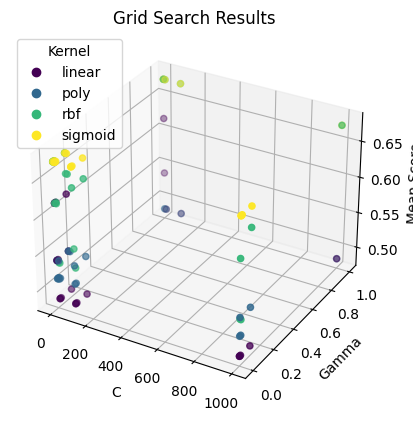

Best parameters set found on development set:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [8]:
mean_scores = results["mean_test_score"]
params = results["params"]

# Extract parameter values for each parameter
param_C = [param['C'] for param in params]
param_gamma = [param['gamma'] for param in params]
param_kernel = [param['kernel'] for param in params]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Mapping kernel names to integer values
kernel_map = {'linear': 0, 'poly': 1, 'rbf': 2, 'sigmoid': 3}
kernel_colors = [kernel_map[kernel] for kernel in param_kernel]

# Plotting the mean scores with color-coded markers based on kernel
scatter = ax.scatter(param_C, param_gamma, mean_scores, c=kernel_colors, cmap='viridis')

ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Mean Score')
ax.set_title('Grid Search Results')
ax.legend(handles=scatter.legend_elements()[0], labels=kernel_map.keys(), title='Kernel')

plt.show()

print("Best parameters set found on development set:")
print(svm_grid.best_params_)


* _Debido al gran tamaño del dataset y de la alta complejidad de ejeución del gridsearch, se decidió realizar el gridsearch en una muestra del 0.5% del dataset original._
* _Existen múltiples hiper-parámetros que alcanzan el mismo score, por lo que se decidió escoger los que menos tiempo de ejecución requirieran._

In [9]:
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score

# Crear el clasificador SVM
clf = svm.SVC(kernel='linear')  # Puedes ajustar el kernel según tus necesidades (lineal, polinómico, RBF, etc.)

# Entrenar el modelo utilizando los datos de entrenamiento
clf.fit(X_entreno, y_entreno)

# Realizar predicciones en el conjunto de prueba
predicciones = clf.predict(X_prueba)

# Calcular el accuracy
accuracy = accuracy_score(y_prueba, predicciones)

# Mostrar el accuracy
print("Accuracy:", accuracy)
print("Recall:", recall_score(y_prueba, predicciones, average='weighted'))
#print("Precision:", precision_score(y_prueba, predicciones, average='weighted'))
#print("F1:", f1_score(y_prueba, predicciones, average='weighted'))

Accuracy: 0.5274564911901416
Recall: 0.5274564911901416


In [10]:
# Se utilizan los hipérparámetros obtenidos en la búsqueda de grilla
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)  

# Entrenar el modelo utilizando los datos de entrenamiento
clf.fit(X_entreno, y_entreno)

# Realizar predicciones en el conjunto de prueba
predicciones = clf.predict(X_prueba)

# Calcular el accuracy
accuracy = accuracy_score(y_prueba, predicciones)

# Mostrar el accuracy
print("Accuracy:", accuracy)
print("Recall:", recall_score(y_prueba, predicciones, average='weighted'))
#print("Precision:", precision_score(y_prueba, predicciones, average='weighted'))
#print("F1:", f1_score(y_prueba, predicciones, average='weighted'))

Accuracy: 0.9382228948221814
Recall: 0.9382228948221814


* _Podemos apreciar que el cambio a los hiperparámetros representa un gran cambio en el score del modelo, por lo que se confirma que los hiperparámetros escogidos son los más óptimos; el accuracy y el recall están por encima del 0.93, lo cual es un buen resultado._

## Impacto de las diferentes variables en el rendimiento del modelo

* _En este acercamiento, se busca observar las variables más implicadas en las condiciones de vida de la madre en vez del desarrollo del embarazo como tal. Con esto, buscamos encontrar el impacto que tienen las condiciones de vida de la madre en el resultado del embarazo._

In [39]:
columnas = X.columns.tolist()
causas = [0, 1]
print(columnas)
for e in columnas:
    print(e)

['Área_Geográfica', 'Asistencia_Recibida', 'Año_Ocurrencia', 'Clase_Parto', 'Edad_Madre', 'Estado_Civil_Madre', 'Escolaridad_Madre', 'Ocupación_Madre', 'Semanas_Gestacion', 'Sexo', 'Sitio_Ocurrencia', 'Tipo_Atencion', 'Total_Hijos_Nacidos', 'Total_Hijos_Nacidos_Muertos', 'Total_Hijos_Vivos', 'Via_Parto', 'Nacionalidad_Madre', 'Grupo_Etnico_Madre']
Área_Geográfica
Asistencia_Recibida
Año_Ocurrencia
Clase_Parto
Edad_Madre
Estado_Civil_Madre
Escolaridad_Madre
Ocupación_Madre
Semanas_Gestacion
Sexo
Sitio_Ocurrencia
Tipo_Atencion
Total_Hijos_Nacidos
Total_Hijos_Nacidos_Muertos
Total_Hijos_Vivos
Via_Parto
Nacionalidad_Madre
Grupo_Etnico_Madre


### Escolaridad de la madre

In [27]:
df0 = df[df['Causa_Defunción'] == 0]
df1 = df[df['Causa_Defunción'] == 1]

In [30]:
# Causa de defunción = 0 = Parto
print(len(df0['Escolaridad_Madre']))
df0['Escolaridad_Madre'].value_counts()

35271


1     10999
2     10369
99     6113
3      3991
4      3303
5       493
6         3
Name: Escolaridad_Madre, dtype: int64

In [31]:
# Causa de defunción = 1 = Embarazo
print(len(df1['Escolaridad_Madre']))
df1['Escolaridad_Madre'].value_counts()

35271


2     13405
1      9924
3      5049
4      3067
99     2884
5       942
Name: Escolaridad_Madre, dtype: int64

* _En relación a la escolaridad de la madre, hay una mayor persistencia de defunciones durante el parto en madres con ninguna educación o con educación primaria._
* _Por otro lado, las defunciones fetales durante el embarazo son más persistentes en madres con primaria._
* _Debido a esto, podemos ver una tendencia a mayor mortalidad en madres con menor nivel de educación._

In [40]:
# Nivel de educación de la madre - Universidad

niveles_edu = [4, 5, 6]

for n in niveles_edu:
    for c in causas:
        df_1 = df[df['Causa_Defunción'] == c] # causa de defunción
        df_1 = df_1[columnas + ['Causa_Defunción']]

        df_1['Escolaridad_Madre'] = n # Universidad

        x_train, x_test, y_train, y_test = train_test_split(df_1.drop('Causa_Defunción', axis=1), df_1['Causa_Defunción'], test_size=0.3, random_state=42)
        y_correct = clf.predict(x_test)

        print("---------------------------------------------------------------------------")
        causa = ''
        if c == 0:
            causa = 'Parto'
        elif c == 1:
            causa = 'Embarazo'

        educacion = ''
        if n == 4:
            educacion = 'Básico'
        elif n == 5:
            educacion = 'Universidad'
        elif n == 6:
            educacion = 'Postgrado'

        print("Causa de defunción: ", causa)
        print("Nivel de educación de la madre: ", educacion)
        
        print('Predicción: ', y_correct)
        print('Realidad: ', y_test.values)
        print("Cambio: ", (y_correct != y_test).sum() / len(y_test) * 100, "%")



---------------------------------------------------------------------------
Causa de defunción:  Parto
Nivel de educación de la madre:  Básico
Predicción:  [0 0 0 ... 0 0 0]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  1.4553014553014554 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Nivel de educación de la madre:  Básico
Predicción:  [1 1 0 ... 0 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  46.33339633339633 %
---------------------------------------------------------------------------
Causa de defunción:  Parto
Nivel de educación de la madre:  Universidad
Predicción:  [0 0 0 ... 0 0 0]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  0.8316008316008316 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Nivel de educación de la madre:  Universidad
Predicción:  [1 1 0 ... 0 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  70.68607068607069 %
------------------------------------------------------

### Total de hijos de la madre

In [50]:
df0 = df[df['Causa_Defunción'] == 0]
df1 = df[df['Causa_Defunción'] == 1]
df0['Total_Hijos_Vivos'] = np.round(df0['Total_Hijos_Vivos'])
df1['Total_Hijos_Vivos'] = np.round(df1['Total_Hijos_Vivos'])
df0['Total_Hijos_Vivos'] = df0['Total_Hijos_Vivos'].astype(int)
df1['Total_Hijos_Vivos'] = df1['Total_Hijos_Vivos'].astype(int)

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_3548\2508835345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Total_Hijos_Vivos'] = np.round(df0['Total_Hijos_Vivos'])
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_3548\2508835345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_Hijos_Vivos'] = np.round(df1['Total_Hijos_Vivos'])
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_3548\2508835345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

* _La cantidad de hijos vivos resulta más relevante que la cantidad de hijos difuntos._

In [51]:
# Causa de defunción = 0 = Parto
print(len(df0['Total_Hijos_Vivos']))
df0['Total_Hijos_Vivos'].value_counts()

35271


3     16616
1      8049
2      4270
4      1748
5      1286
0       981
6       917
7       570
8       365
9       224
10      139
11       69
12       24
13       10
16        1
15        1
14        1
Name: Total_Hijos_Vivos, dtype: int64

In [52]:
# Causa de defunción = 1 = Embarazo
print(len(df1['Total_Hijos_Vivos']))
df1['Total_Hijos_Vivos'].value_counts()

35271


3     14610
1      8985
2      5806
4      1661
5      1422
6       975
7       503
9       418
8       296
0       271
10      201
11       74
12       49
Name: Total_Hijos_Vivos, dtype: int64

* _El punto de cambio en la cantidad de hijos vivos se encuentra en 4 hijos vivos, donde se observa un cambio en la tendencia de la mortalidad._

In [53]:
# Nivel de educación de la madre - Universidad
from random import randint

i = 0
while i < 4:
    for c in causas:
        df_1 = df[df['Causa_Defunción'] == c] # causa de defunción
        df_1 = df_1[columnas + ['Causa_Defunción']]

        if i < 2:
            # random upsample
            n = randint(0, 4)
            df_1['Total_Hijos_Vivos'] = n 
        else:
            # random downsample
            n = randint(5, 10)
            df_1['Total_Hijos_Vivos'] = n

        #df_1['Escolaridad_Madre'] = n # Universidad

        x_train, x_test, y_train, y_test = train_test_split(df_1.drop('Causa_Defunción', axis=1), df_1['Causa_Defunción'], test_size=0.3, random_state=42)
        y_correct = clf.predict(x_test)

        print("---------------------------------------------------------------------------")
        causa = ''
        if c == 0:
            causa = 'Parto'
        elif c == 1:
            causa = 'Embarazo'


        print("Causa de defunción: ", causa)
        print("Cantidad de hijos vivos: ", n)
        
        print('Predicción: ', y_correct)
        print('Realidad: ', y_test.values)
        print("Cambio: ", (y_correct != y_test).sum() / len(y_test) * 100, "%")

    i += 1



---------------------------------------------------------------------------
Causa de defunción:  Parto
Cantidad de hijos vivos:  0
Predicción:  [0 0 0 ... 0 0 0]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  1.2852012852012853 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Cantidad de hijos vivos:  0
Predicción:  [0 1 0 ... 0 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  54.12965412965413 %
---------------------------------------------------------------------------
Causa de defunción:  Parto
Cantidad de hijos vivos:  1
Predicción:  [ 0  0  0 ...  0  0 99]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  2.1924021924021924 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Cantidad de hijos vivos:  1
Predicción:  [1 1 1 ... 0 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  24.787374787374787 %
---------------------------------------------------------------------------
Causa de defunción:  Parto
Ca

### Estado civil de la madre

In [45]:
df0 = df[df['Causa_Defunción'] == 0] # Parto
df1 = df[df['Causa_Defunción'] == 1] # Embarazo

In [19]:
df0['Estado_Civil_Madre'].value_counts()

1     18061
2     14216
99     2891
3       103
Name: Estado_Civil_Madre, dtype: int64

In [20]:
df1['Estado_Civil_Madre'].value_counts()

1     17264
2     16579
99     1071
3       357
Name: Estado_Civil_Madre, dtype: int64

In [47]:
# Nivel de educación de la madre - Universidad

estadoCivil = {1:'Soltera', 2:'Casada', 3:'Unión Libre'}

for n in estadoCivil:
    for c in causas:
        df_1 = df[df['Causa_Defunción'] == c] # causa de defunción
        df_1 = df_1[columnas + ['Causa_Defunción']]

        df_1['Estado_Civil_Madre'] = n # Universidad

        x_train, x_test, y_train, y_test = train_test_split(df_1.drop('Causa_Defunción', axis=1), df_1['Causa_Defunción'], test_size=0.3, random_state=42)
        y_correct = clf.predict(x_test)

        print("---------------------------------------------------------------------------")
        causa = ''
        if c == 0:
            causa = 'Parto'
        elif c == 1:
            causa = 'Embarazo'

        print("Causa de defunción: ", causa)
        print("Estado civil de la madre: ", estadoCivil[n])
        
        print('Predicción: ', y_correct)
        print('Realidad: ', y_test.values)
        print("Cambio: ", (y_correct != y_test).sum() / len(y_test) * 100, "%")



---------------------------------------------------------------------------
Causa de defunción:  Parto
Estado civil de la madre:  Soltera
Predicción:  [ 0  0  0 ...  0  0 99]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  2.164052164052164 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Estado civil de la madre:  Soltera
Predicción:  [1 1 1 ... 1 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  3.6004536004536005 %
---------------------------------------------------------------------------
Causa de defunción:  Parto
Estado civil de la madre:  Casada
Predicción:  [ 0  0  0 ...  0  0 99]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  2.353052353052353 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Estado civil de la madre:  Casada
Predicción:  [1 1 1 ... 1 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  3.4303534303534304 %
--------------------------------------------------------------------------

### Edad de la madre

In [21]:
df0 = df[df['Causa_Defunción'] == 0]
df1 = df[df['Causa_Defunción'] == 1]

In [22]:
df0['Edad_Madre'].value_counts()

27.67464    3238
21.00000    1589
20.00000    1561
22.00000    1546
23.00000    1457
24.00000    1442
25.00000    1433
19.00000    1400
26.00000    1398
27.00000    1362
28.00000    1350
30.00000    1289
29.00000    1263
31.00000    1261
33.00000    1207
32.00000    1179
34.00000    1172
18.00000    1150
35.00000    1070
17.00000    1032
36.00000     960
37.00000     920
38.00000     833
39.00000     744
16.00000     665
40.00000     626
41.00000     529
42.00000     428
15.00000     356
43.00000     257
44.00000     184
14.00000     131
45.00000     110
46.00000      46
13.00000      32
47.00000      15
48.00000      10
12.00000       7
49.00000       4
52.00000       4
11.00000       3
50.00000       3
51.00000       2
53.00000       2
57.00000       1
Name: Edad_Madre, dtype: int64

In [23]:
df1['Edad_Madre'].value_counts()

25.00000    2135
21.00000    2116
22.00000    1885
31.00000    1803
23.00000    1800
18.00000    1730
26.00000    1603
33.00000    1466
29.00000    1365
24.00000    1304
35.00000    1295
27.00000    1247
32.00000    1238
20.00000    1229
30.00000    1219
36.00000    1189
27.67464    1186
34.00000    1155
19.00000    1141
40.00000     875
41.00000     794
38.00000     755
37.00000     741
28.00000     740
17.00000     739
39.00000     715
15.00000     378
16.00000     354
42.00000     303
43.00000     258
44.00000     203
47.00000     125
46.00000     123
14.00000      62
Name: Edad_Madre, dtype: int64

### Etnia de la madre

In [24]:
df0 = df[df['Causa_Defunción'] == 0]
df1 = df[df['Causa_Defunción'] == 1]

In [25]:
df0['Grupo_Etnico_Madre'].value_counts()

1     12317
2      8797
99     7016
3      3674
4      3051
5       383
6        19
7        14
Name: Grupo_Etnico_Madre, dtype: int64

In [26]:
df1['Grupo_Etnico_Madre'].value_counts()

1     11053
2      8933
3      5580
99     4787
4      4459
5       400
6        59
Name: Grupo_Etnico_Madre, dtype: int64

In [48]:

etnias = {
    1: 'Maya',
    2: 'Ladina/Mestiza',
    3: 'Indígena',
    4: 'No Indígena',
    5: 'Otra',
    6: 'Garífuna',
    7: 'Xinca'
}

for n in etnias:
    for c in causas:
        df_1 = df[df['Causa_Defunción'] == c] # causa de defunción
        df_1 = df_1[columnas + ['Causa_Defunción']]

        df_1['Grupo_Etnico_Madre'] = n # etnia

        x_train, x_test, y_train, y_test = train_test_split(df_1.drop('Causa_Defunción', axis=1), df_1['Causa_Defunción'], test_size=0.3, random_state=42)
        y_correct = clf.predict(x_test)

        print("---------------------------------------------------------------------------")
        causa = ''
        if c == 0:
            causa = 'Parto'
        elif c == 1:
            causa = 'Embarazo'

        print("Causa de defunción: ", causa)
        print("Etnia de la madre: ", etnias[n])
        
        print('Predicción: ', y_correct)
        print('Realidad: ', y_test.values)
        print("Cambio: ", (y_correct != y_test).sum() / len(y_test) * 100, "%")

---------------------------------------------------------------------------
Causa de defunción:  Parto
Etnia de la madre:  Maya
Predicción:  [ 0  0  0 ...  0  0 99]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  3.60990360990361 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Etnia de la madre:  Maya
Predicción:  [1 1 0 ... 1 0 0]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  26.923076923076923 %
---------------------------------------------------------------------------
Causa de defunción:  Parto
Etnia de la madre:  Ladina/Mestiza
Predicción:  [ 0  0  0 ...  0  0 99]
Realidad:  [0 0 0 ... 0 0 0]
Cambio:  3.1374031374031373 %
---------------------------------------------------------------------------
Causa de defunción:  Embarazo
Etnia de la madre:  Ladina/Mestiza
Predicción:  [1 1 0 ... 1 1 1]
Realidad:  [1 1 1 ... 1 1 1]
Cambio:  16.310716310716312 %
---------------------------------------------------------------------------
Causa de defunci